**VueJs**: Framework Js phát triển web phía giao diện, ra mắt 2014. Là sự kết hợp của angular và react.

### **Cài đặt môi trường**
Lệnh tạo dự án với vue phiên bản mới nhất :`npm create vue@latest`  
Lệnh cài đặt thư viện: `npm i`  
Lệnh chạy ứng dụng chế độ dev: `npm run dev`  
*Cài đặt môi trường và chạy thành công*  
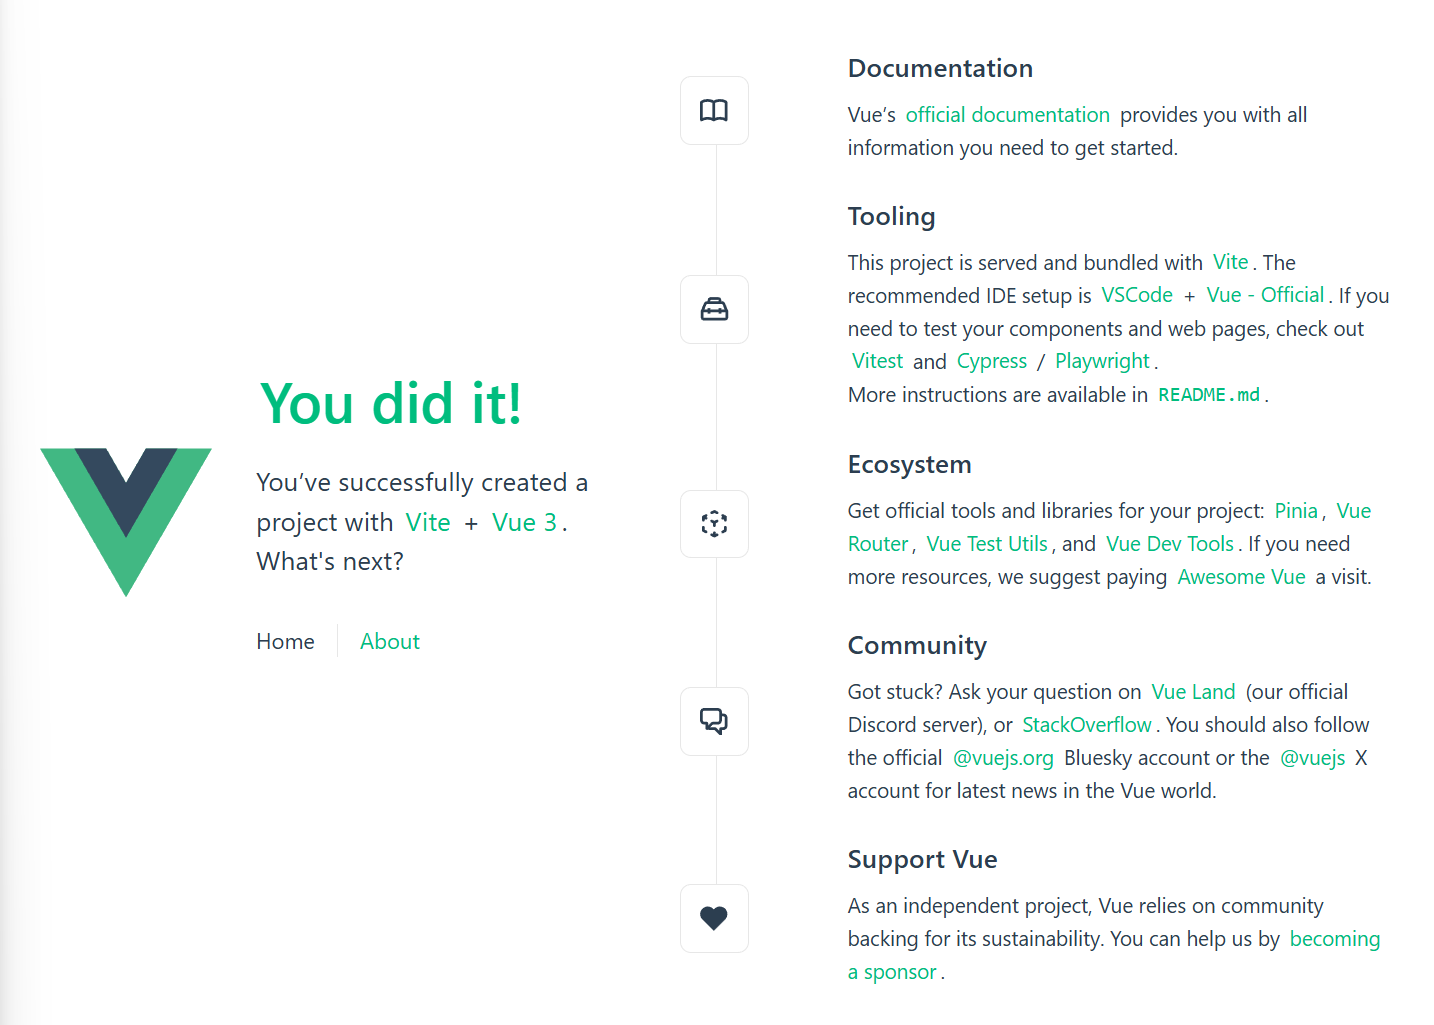  
*Helloworld*  
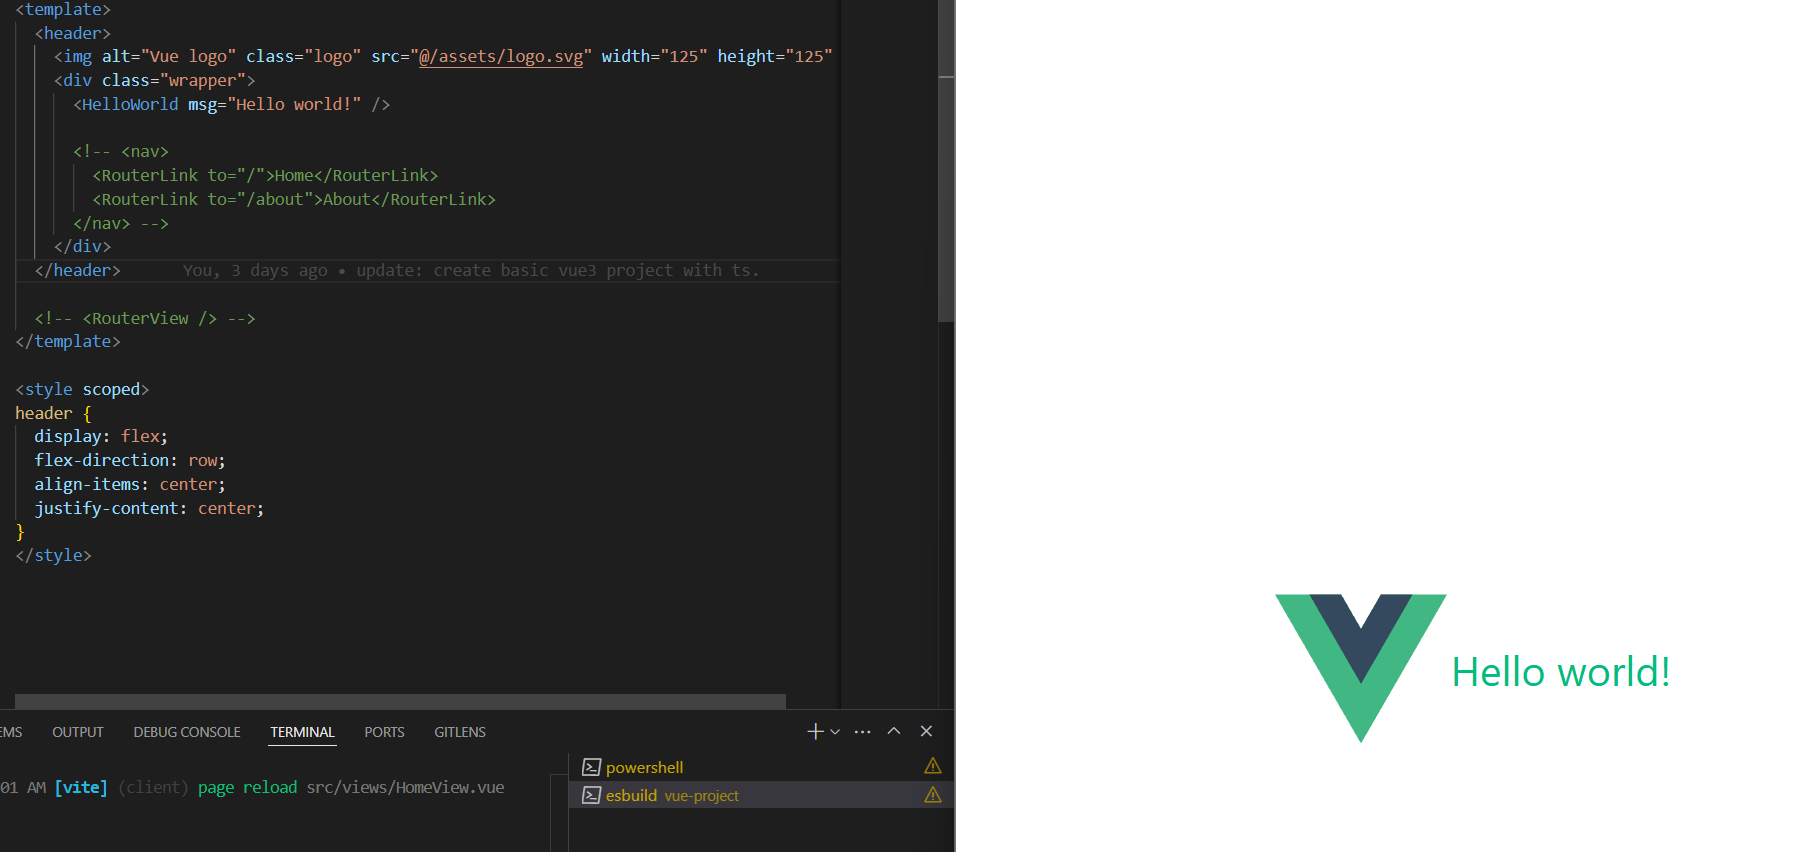  
### **Thành phần cơ bản**
**Attribute Binding:** Cách liên kết các thuộc tính html với dữ liệu trong component.  
*Cú pháp cơ bản:*  
```html
    <img :src="imageUrl" :class="myclass" alt="Ảnh sản phẩm" />
    <!-- hoặc -->
    <img v-bind:src="imageUrl" v-bind:class="myclass" />

    <script>
        // ....
        export default {
            data() {
                return {
                    myclass: "class1 class2"
                }
            }
            }
    </script>
```  
*Cú pháp binding nhiều thuộc tính 1 lần:*  
```html
    <div v-bind="cus_attributes"> </div>

    <script>
        // ...
        export default {
            data() {
                return {
                cus_attributes: {
                    id: 'cus_id',
                    class: 'cus_class',
                    'data-role': 'container'
                }
                }
            }
            }
    </script>
```  

**Conditional Rendering && List Rendering:** Render có điều kiện  
*Các directive được cung cấp*:
`v-if`  `v-else-if` `v-else`   
*Demo sử dụng else if để hiển thị*  
```html
<script>
export default {
  data() {
    return {
      myValue: ''
    }
  },
  computed: {
    numberValue() {
      return Number(this.myValue);
    }
  }
}
</script>

<template>
  <main>
    <div class="p-4 bg-gray-50 border border-gray-100 flex flex-col gap-4">
      <span :class="myclass"> {{ myValue ? `Số đã nhập là: ${myValue}` : "This is home content!" }}</span>

      <span v-if="numberValue > 150">Không có người nào lớn hơn 1000 tuổi</span>
      <span v-else-if="numberValue > 50">Hơn 50 tuổi, chào bác</span>
      <span v-else-if="myValue !== ''">Chào chú</span>

      <input v-model="myValue" class="px-3 p-2 border border-gray-300" type="number"
        placeholder="Bạn bao nhiêu tuổi ?" />
    </div>
  </main>
</template>
```   
*Kết quả hiển thị*  
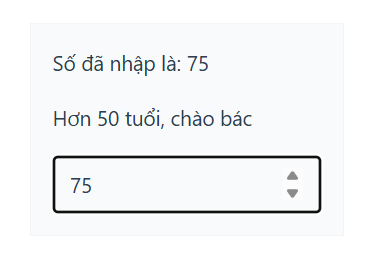  

*Render list với `v-for`*  
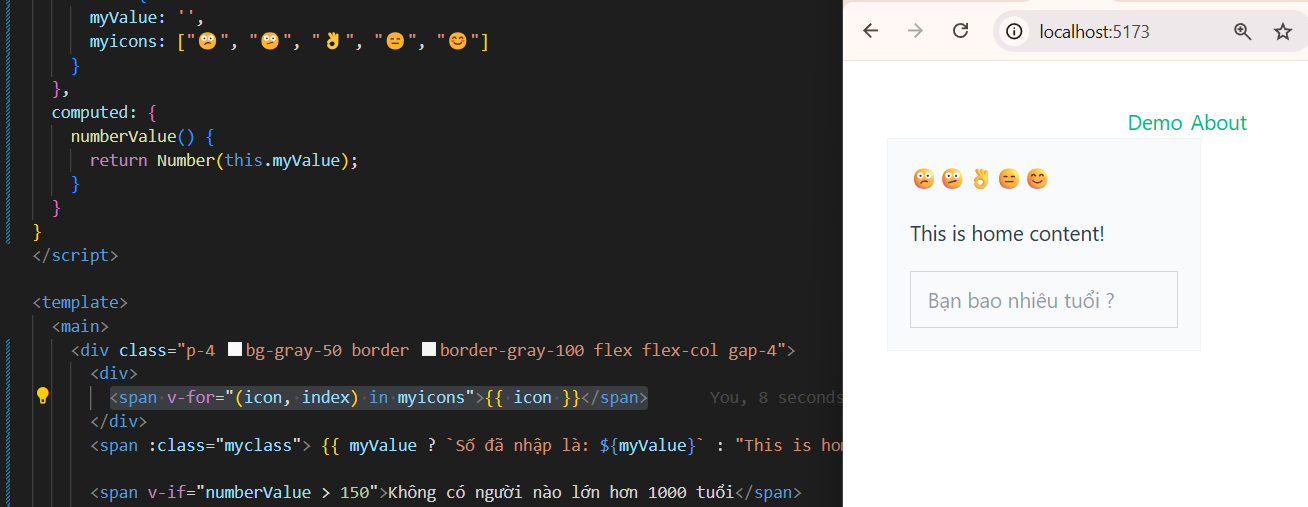  
Cú pháp: `<span v-for="(icon, index) in myicons">`  
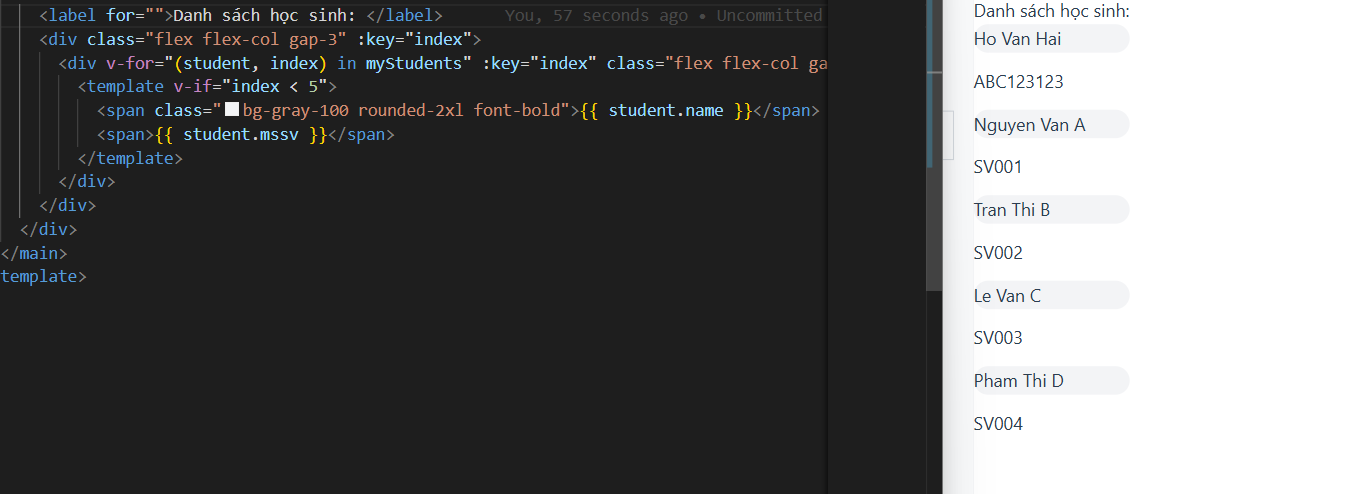  

**Event Handling:** Xử lý sự kiện với `v-on`  
```html
<template>
  <button v-on:click="handleClick">Click</button>
</template>

<script setup>
import { ref } from 'vue';

const message = ref('Hello Vue!');

const handleClick = () => {
  alert(message.value);
  message.value = 'Button clicked!'; 
};
</script>
```  
*Demo xử lý sự kiện click vào icon*  
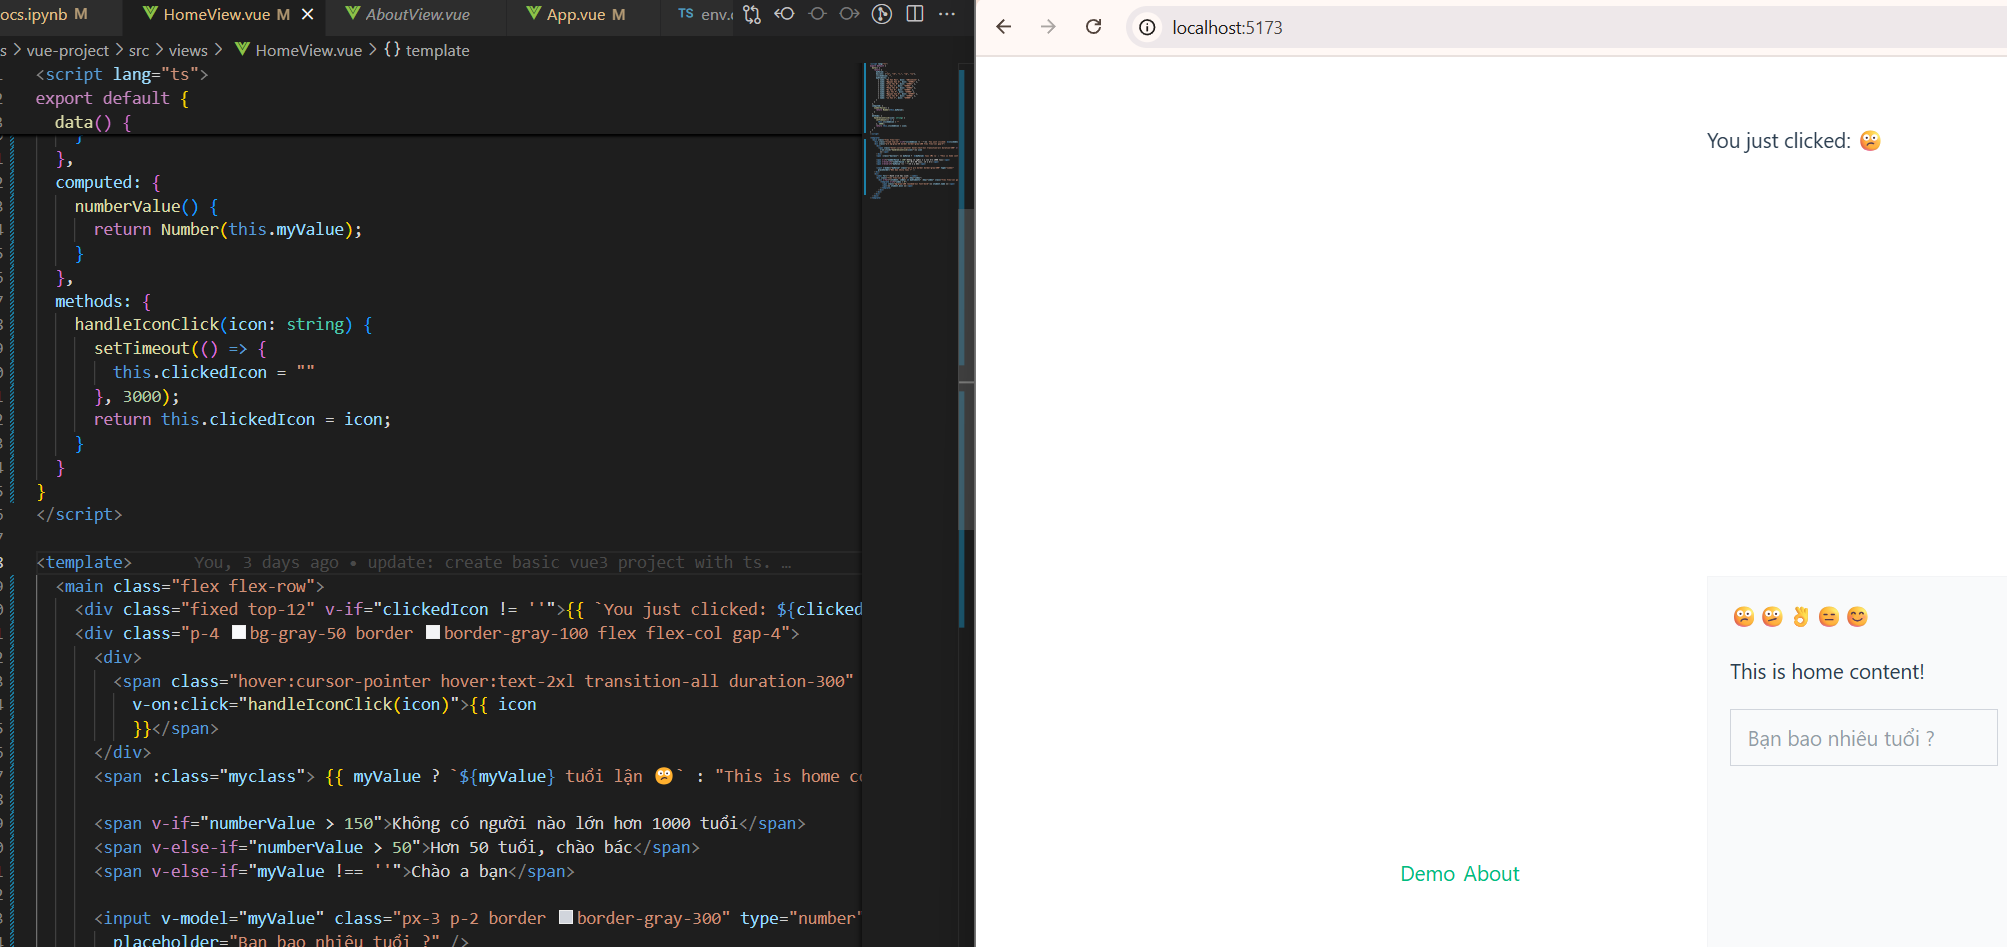  

**Component && Communicating Event**  
Component: thành phần tái sử dụng, bản thân nó chứa dữ liệu, logic và teplate của riêng nó.
*Cấu trúc 1 component*  
```html
<template></template>

<script></script>

<style></style>
```
Giao tiếp giữa các component cha-con  
Component con: đăng ký sự kiện với this.$emit(<nhãn sự kiện>, tham số)
Component cha: gọi sụ kiện bằng @<nhãn sụ kiện>="hàm thực hiện"  
*Nhận sự kiện ở component cha:*  
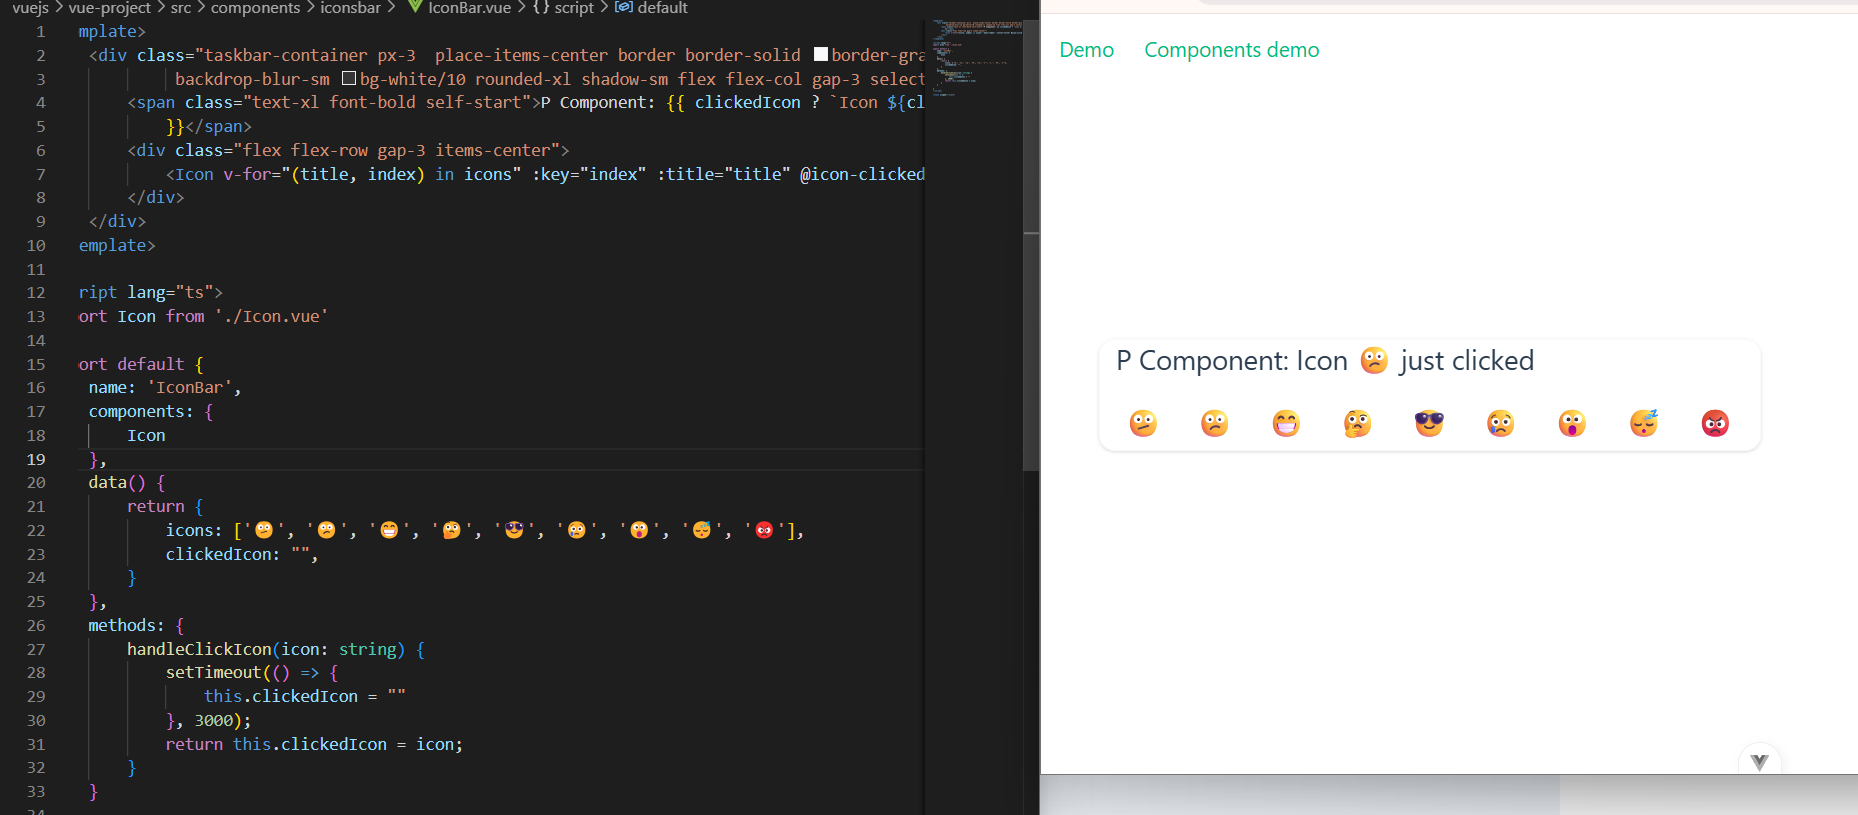  

**Reactivity** (tạo, cập nhật các biến reactive, sử dụng watch, computed, ...)   
Cho phép giao diện tự động cập nhật dữ liệu, không cần thao tác DOM thủ công. Là cách quản lý state của 1 component trong **Composition API**  
1. Tạo biến Reactive: `ref()` và `reactive()`  
- `ref()`: Hàm tạo 1 đối tượng reactive xung quang 1 giá trị, được sử dụng để tạo biến reactive. Đối tượng này để theo dõi các thay đổi, nên cần sử dụng .value để cập nhật giá trị, trong template, tự động được unwrap, không cần `.value`.
```html
<script>
import {ref} from 'vue';

const count = ref(0); // một rè được tạo với giá trị số
const user = ref({ // ref cho 1 đối tượng.
    name: "Hai",
    age: 22
})
// thay đổi giá trị với value (chỉ với value)
// Vì ref trả về 1 đối tượng, không phải 1 giá trị.
const changeValue() {
    count.value++;
    user.value = {
        name: "Hải",
        age: 23
    }
}
</script>
```  
- `reactive()`: Tương tự `ref`, tuy nhiên, reactive được thiết kế đặc biệt cho đối tương và mảng. không sử dụng value để truy cập hoặc thay đối thuộc tính của đối tượng reactive.  
```html
<script>
import {reactive} from "vue"

const laptop = reactive({
    name: "Lenovo",
    year: "2022"
})

const changeReactive() {
    laptop.name = "Lenovo IdeaPad"
}
</script>
```  
| ref | reactive |
| --- | -------- |
| Mọi loại giá trị. | Dùng cho đối tượng, mảng.  |
| Sử dụng `.value` để thay đổi giá trị | Không cần `.value` | 

- **`computed()`**: Tính toán các thuộc tính, cho phép định nghĩa các thuộc tính mà giá trị của chúng được tính toán dựa trên các dữ liệu reactive khác. Được tính toán lại khi các phụ thuộc của chúng thay đổi.  
```html
<script>
import {ref, computed} from "vue"

const price = ref(10000);
const quantity = ref(1200);

const totalPrice = computed(()=>{ // là 1 computed ref, Ref<number>
    return price.value + quantity.value; // ref thay đổi, computed được gọi lại
})

</script>
```
- **`watch()`**: Cho phép thực thi khi 1 hoặc nhiều nguồn ref thay đổi. Cần thiết khi thực hiện các hành động bất đồng bộ, side effect,...  
*Các tuỳ chọn*  

| Tuỳ chọn   | Giá trị | Chi tiết |
|-----------|---------|----------|
| immediate | true    | Chạy callback ngay lập tức khi watcher được tạo |
| deep      | true (default)   | Nếu đang watch một `ref` chứa object/mảng, `deep: true` cho phép lắng nghe các thay đổi bên trong |
| flush     | {`pre`, `post`, `sync`} | Chỉ định thời điểm gọi watcher (`pre`, `post`, `sync`) |  

```html
<script>
    import {ref, watch} from 'vue'
    const myObject = ref({
        a: 1,
        b: {
            c:2
        }
    })
    watch(myObject, (newValue, oldValue) => {
        console.log('Object change', newValue )
    }, {deep: true})
</script>
```  
Khi nào sử dụng `computed` và `watch`  
| Mục đích                            | `computed()`    | `watch()`                    |
| ----------------------------------- | -------------------- | --------------------------------- |
| Tính toán và trả về giá trị mới     | ✅       | ❌                 |
| Theo dõi và tương tác phụ | ❌                    | ✅                    |
| Theo dõi sâu (deep object/array)    | ❌  | ✅ `deep: true`          |
| Theo dõi nhiều biến một lúc         | ❌               | ✅  mảng `ref`  |
| Gọi API khi dữ liệu thay đổi        | ❌                    | ✅                      |


**Composition API (setup)**: Tập hợp APIs cho phép soạn thảo logic trong 1 component, thay vì tổ chức code như các tuỳ chọn như Options APIs, COmposition tổ chức code theo tính năng.  
`<script setup>` là cải tiến cú pháp Composition apis. Sử dụng composition apis gọn gàng và hiệu quả hơn.  
*Minh hoạ tổ chức code với Composition apis*  
```html 
<script setup>
import { ref, reactive } from 'vue';

const count = ref(0); 
const message = ref('Vue 3!'); 

const user = reactive({ // reactive object
  name: 'Alice',
  age: 30
});

const products = ref([ // reactive objects array
  { id: 1, name: 'Laptop', price: 1200 },
  { id: 2, name: 'Keyboard', price: 75 }
]);
</script>
```


### **Kiến trúc mã nguồn, life cycle**

### **Khác:**


### **Pinia**